# Project 6 - Vizualizing Monetary Policy

In [1]:
import pandas as pd
import pandas_datareader as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(),
                freq = "M"): #str "D", "W", "M", "Q", "A", also "2D"
    df_init = False
    for name, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:name}, inplace = True)
            df_init = True
        else:
            df[name] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    return df

def bil_to_mil(series):
    return series.mul(10**3)

In [2]:
start = datetime.datetime(1970,1,1)
end = datetime.datetime.today()
freq = "M"

In [3]:
data_codes = {"Monetary Base": "BOGMBASE",
             "Currency in Circulation": "WCURCIR"}
monetary_base = gather_data(data_codes, 
                            start, 
                            end, 
                            freq)
monetary_base

,Monetary Base,Currency in Circulation
DATE,,
1970-01-31,76400.0,NaN
1970-02-28,75200.0,NaN
1970-03-31,75300.0,NaN
1970-04-30,76300.0,NaN
1970-05-31,76600.0,NaN
...,...,...
2021-04-30,6042100.0,2154.81925
2021-05-31,6041900.0,2167.94475
2021-06-30,6027100.0,2178.90020


In [4]:
from datlib.plots import *
from datlib.FRED import *

In [8]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime.today()

data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [9]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594678.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,408.50,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064
2000-02-29,578000.0,566143.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,243.00,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022
2000-03-31,577100.0,563705.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,209.40,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233
2000-04-30,578600.0,564733.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,267.50,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508
2000-05-31,580600.0,565835.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,250.60,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,6042100.0,2154819.25,7775974.00,7614925.00,7207246.25,4986900.00,2347.0,2217999.25,0.00,759.75,...,3884245.25,953095.75,372836.75,5255878.75,NaN,0.25,0.069000,0.100000,NaN,NaN
2021-05-31,6041900.0,2167944.75,7866893.25,7709974.25,7291913.75,5063447.75,2347.0,2226119.00,11.75,642.50,...,3883067.75,862533.00,380029.00,5142879.50,NaN,0.25,0.058065,0.100000,NaN,NaN
2021-06-30,6027100.0,2178900.20,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.00,516.00,...,3789613.40,767312.40,332965.60,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN


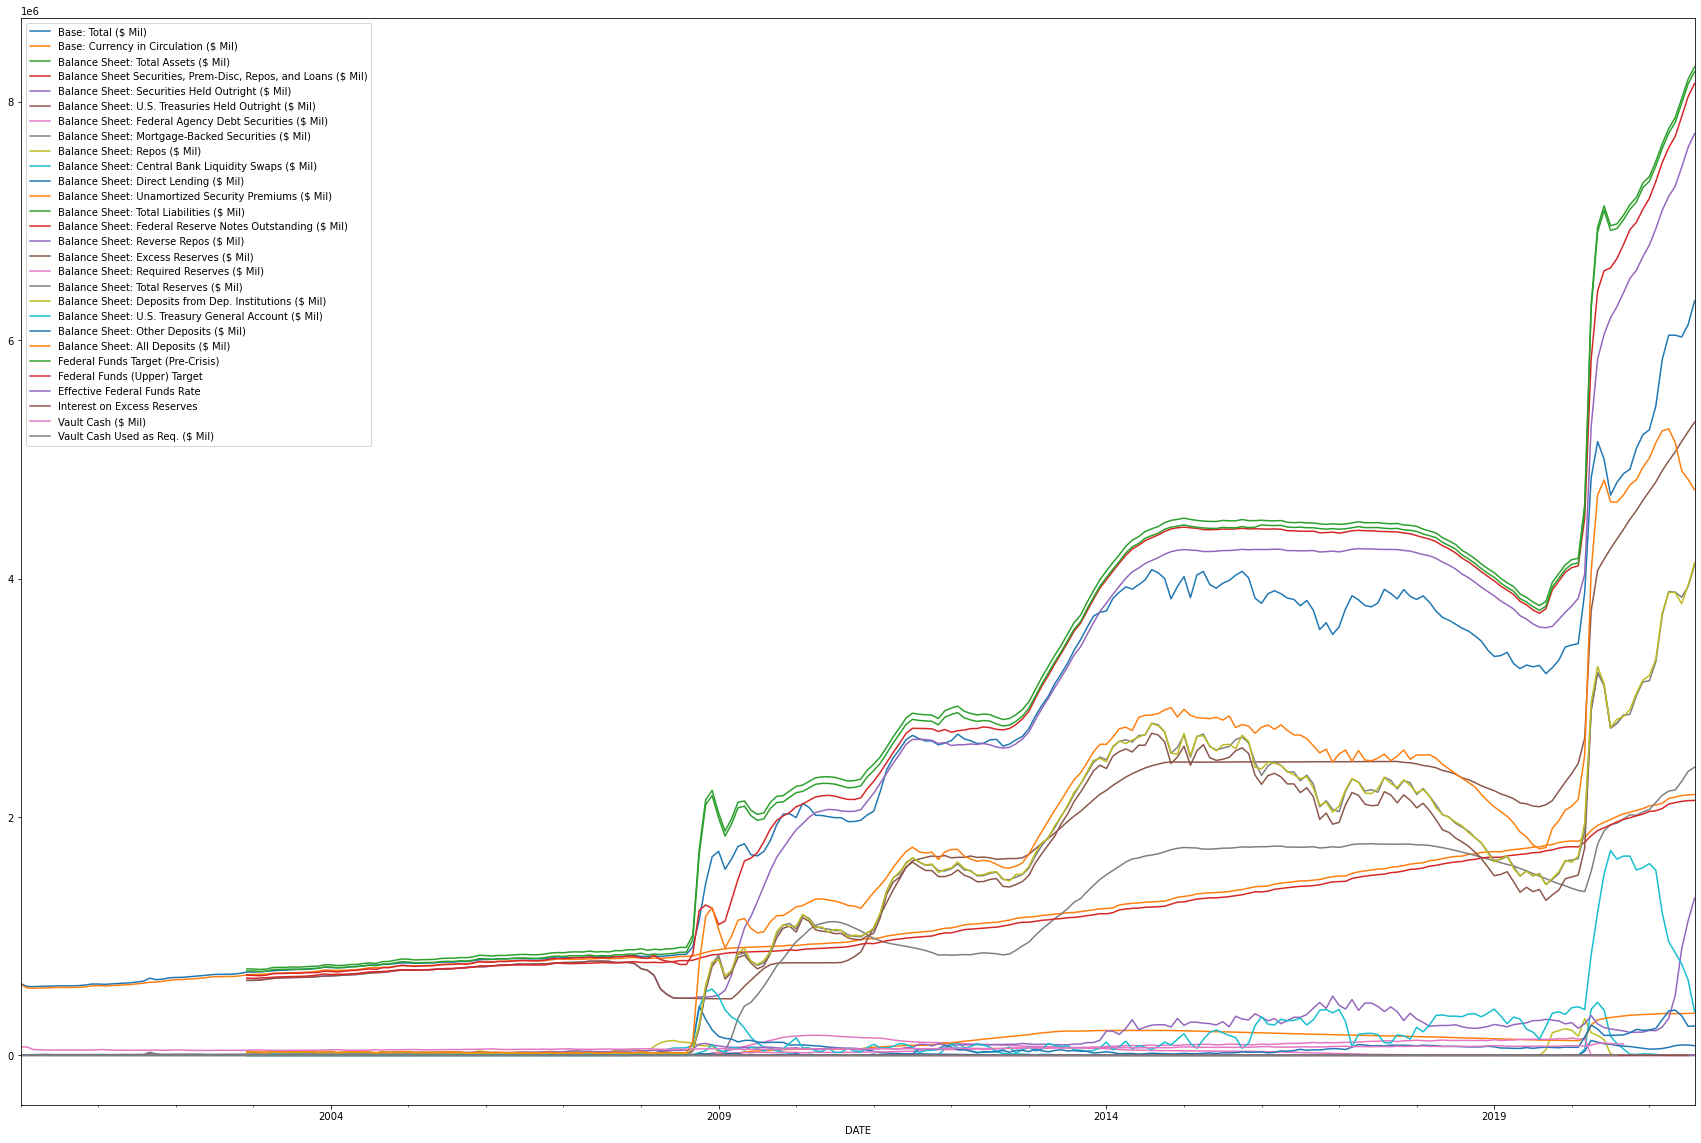

In [11]:
fig, ax = plt.subplots(figsize = (30,20))
data.plot(ax = ax);